In [102]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv('./data_pd/MS_Dhoni_ODI_record.csv')

In [104]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [105]:
# Data cleaning - Opposition name says 'v Aus' etc we have to remove 'v'
#df['opposition'] = df['opposition'].apply(lambda x:x[2:])

df['opposition'] = df['opposition'].str.replace('v','', regex=False).str.strip()
# Regex=False means that first string ('v ') is not a regex, but a literal string
df['opposition']

0       Bangladesh
1       Bangladesh
2       Bangladesh
3         Pakistan
4         Pakistan
          ...     
345    West Indies
346        England
347     Bangladesh
348      Sri Lanka
349    New Zealand
Name: opposition, Length: 350, dtype: object

In [106]:
# Add a 'feature'  - 'year' column using the match date column
# First convert date column intp datetiem format
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['year'] = df['date'].dt.year.astype(int)
# df['year']
df['date']
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019


In [107]:
# Creating a new col to distinguish between outand not out
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'),1,0)
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0
...,...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019,0


In [108]:
# dropping the odi_number feature because it adds no value to the analysis
df.drop(columns='odi_number', inplace=True) #if you don't use inplace=True then the change will be temporary in the dataframe
# OR
# df = df.drop(columns='odi_number')
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,2019,0


In [109]:
# dropping those innings where Dhoni did not bat and storing it in  a new Dataframe
# Take all the columns, starting with run_scored
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TNDB')), 'runs_scored':]
df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [110]:
df_new = df_new[df_new['runs_scored'].str.contains('-') != True]

In [111]:
# fixing the data types of the numerical columns
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)

In [112]:
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91.80,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


In [113]:
first_match_date = df['date'].dt.date.min().strftime('%B %d, %Y')   # first match
print('First match: ',first_match_date)

last_match_date = df['date'].dt.date.max().strftime('%B %d, %Y')
print('First match: ',last_match_date)

number_of_matches = df.shape[0]     #no. of matches played in career
print('Number of matches played : ',number_of_matches )

number_of_inns = df_new.shape[0]
print('Number of innings played : ',number_of_inns )

not_outs = df_new['not_out'].sum()  # number of not outs in his career
print('Not outs: ',not_outs)

runs_scored = df_new['runs_scored'].sum()   # runs scored in career
print('Runs scored in career : ', runs_scored)

balls_faced = df_new['balls_faced'].sum()   # balls faced in career
print('Number of balls faced : ', balls_faced)

career_sr = (runs_scored / balls_faced)*100     # career strike rate
print('career strike rate : {:0.2f}'.format(career_sr))

career_avg = (runs_scored / (number_of_inns - not_outs))    #career average
print('Career average: {:0.2f}'.format(career_avg))

hundreds = (df_new['runs_scored'] >= 100).sum()
print('Number of hundreds : ' , hundreds)

fifties = ((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100)).sum()
print('NUmber of fifties : ', fifties)

fours = df_new['fours'].sum()   # number of fours in career
print('Number of 4s : ',fours)

sixes = df_new['sixes'].sum()   # number of sixes in career
print('Number of 6s : ',sixes)




First match:  December 23, 2004
First match:  July 09, 2019
Number of matches played :  350
Number of innings played :  297
Not outs:  84
Runs scored in career :  10773
Number of balls faced :  12303
career strike rate : 87.56
Career average: 50.58
Number of hundreds :  10
NUmber of fifties :  73
Number of 4s :  826
Number of 6s :  229


In [114]:
# number of matches played against different opposition
# Count the occurences of each unique value in the 'opposition' column
# opposition_counts will be a series with a labelled index as opposition
opposition_counts = df['opposition'].value_counts()
print(opposition_counts)


opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


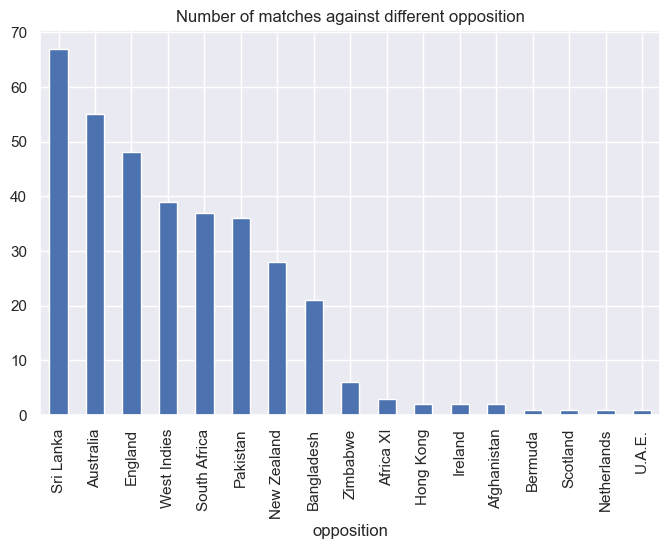

In [115]:
# plot the counts as a bar plot
opposition_counts.plot(kind='bar', title='Number of matches against different opposition' ,figsize=(8,5))
plt.show()

In [116]:
# Runs scored against each team 
# Group the dataframe by 'opposition' column
grouped_by_opposition = df_new.groupby('opposition')
#Sum the runs scored column for each group
sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32


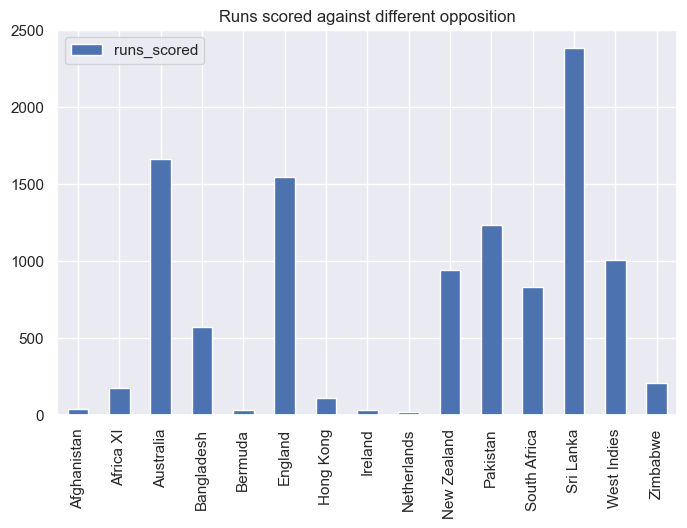

In [117]:
# sum_of_runs_scored is a series with a labelled index which is opposition 
# convert it into dataframe and remove the index
runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.plot(x='opposition', kind='bar', title='Runs scored against different opposition', figsize=(8,5))
plt.xlabel(None)
plt.show() 

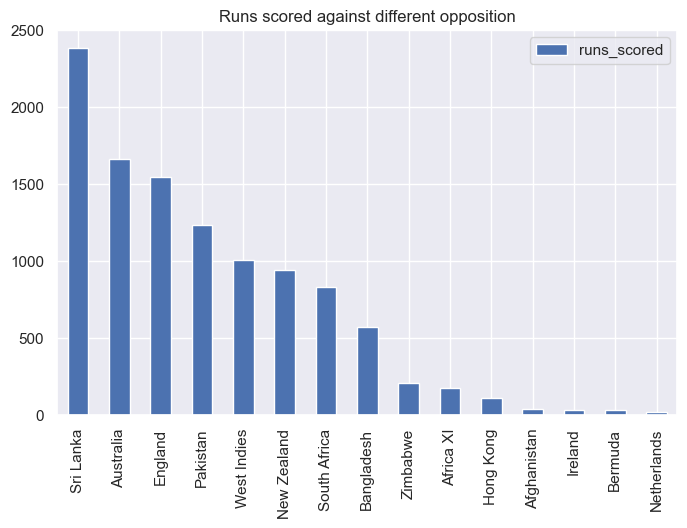

In [118]:
# does not look good ... let us sort it
sorted = runs_scored_by_opposition.sort_values(by='runs_scored', ascending=False)

sorted.plot(x='opposition', kind='bar', title='Runs scored against different opposition', figsize=(8,5))
plt.xlabel(None)
plt.show() 

<Axes: xlabel='opposition', ylabel='runs_scored'>

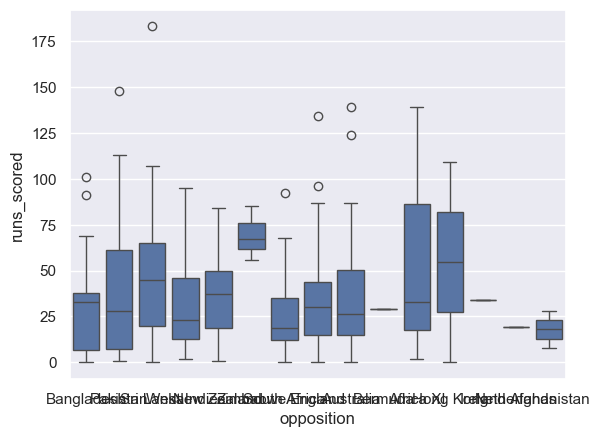

In [119]:
# Boxplot of runs against avrious oppositions
sns.boxplot(x='opposition', y='runs_scored', data=df_new)

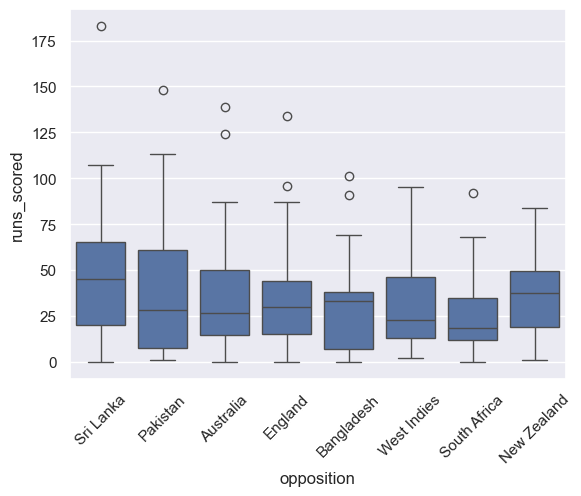

In [120]:
# Looks crowded - Let us retain only major countries
# List of Opposition to filter
opposition_list = ['England','Australia','West Indies','South Africa', 'New Zealand','Pakistan','Sri Lanka','Bangladesh']
# filter rows where 'opposition is in the list
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]
df_filtered = df_filtered.sort_values(by='runs_scored', ascending=False)
sns.boxplot(x='opposition', y='runs_scored', data=df_filtered)
plt.xticks(rotation=45)
plt.show()


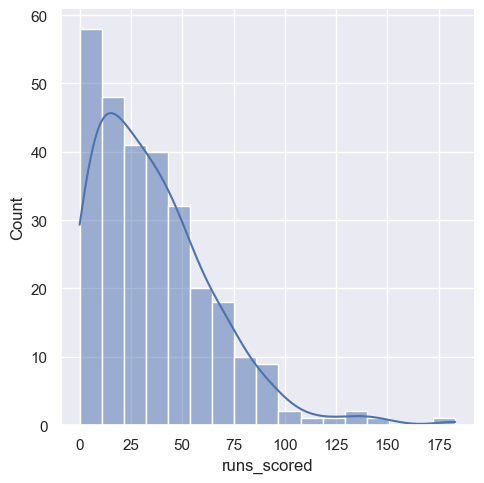

In [121]:
#KDE plot
sns.displot(data=df_filtered, x='runs_scored', kde=True)
plt.show()

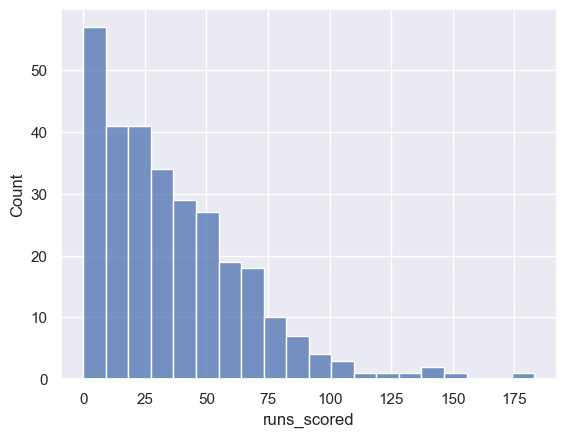

In [122]:
sns.set(style='darkgrid')
sns.histplot(data=df_new, x='runs_scored', bins=20)
plt.show()

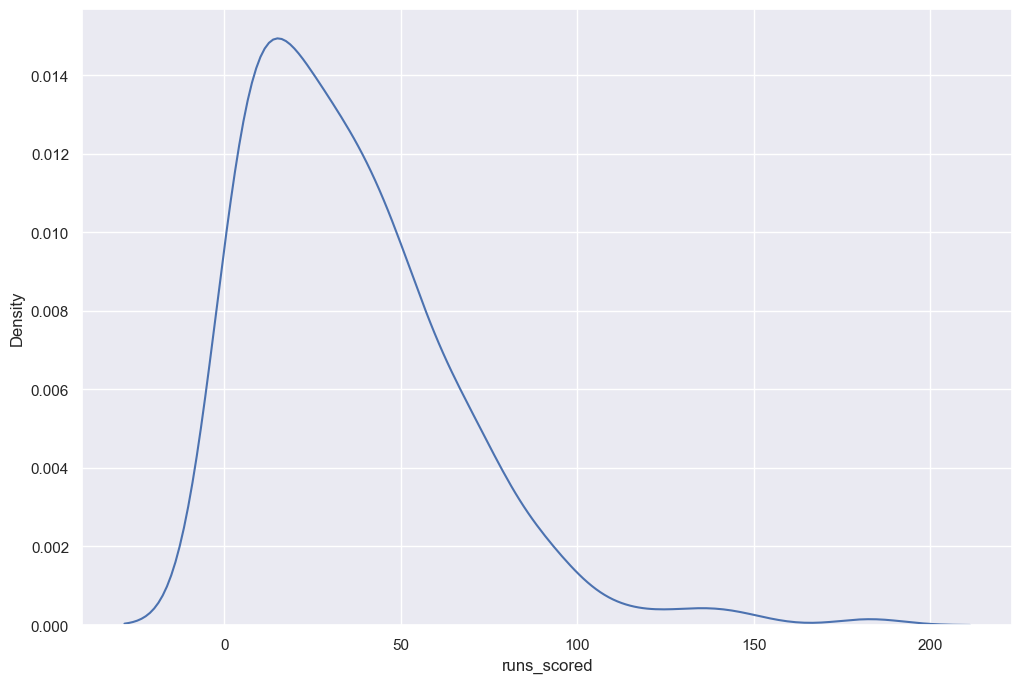

In [123]:
#KDE plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_filtered, x='runs_scored')
plt.show()

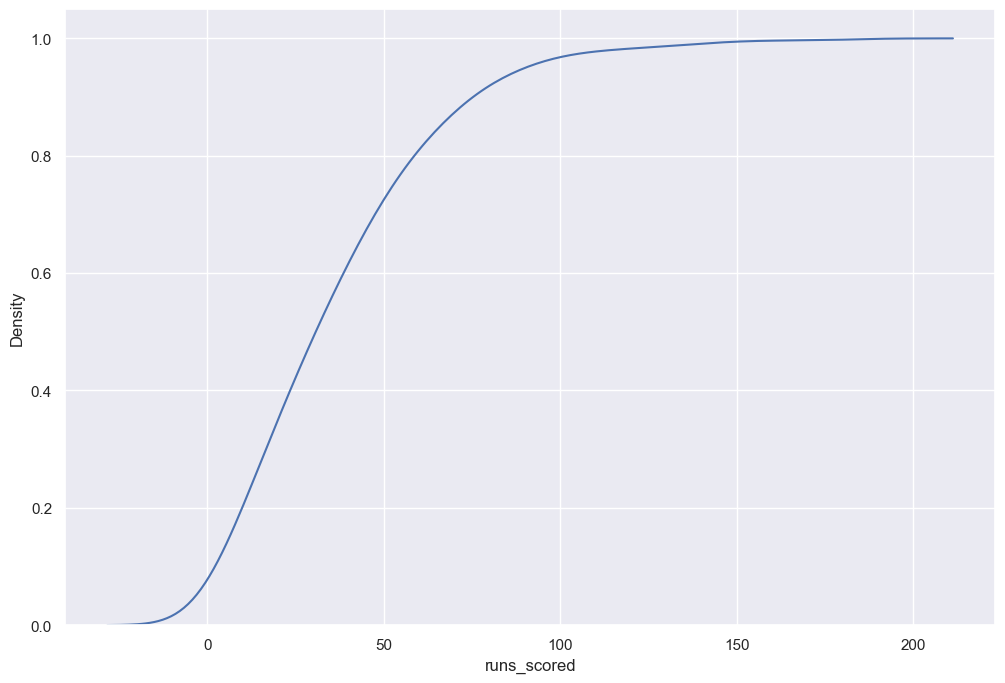

In [124]:
#KDE plot with cumulative
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_filtered, x='runs_scored', cumulative=True)
plt.show()

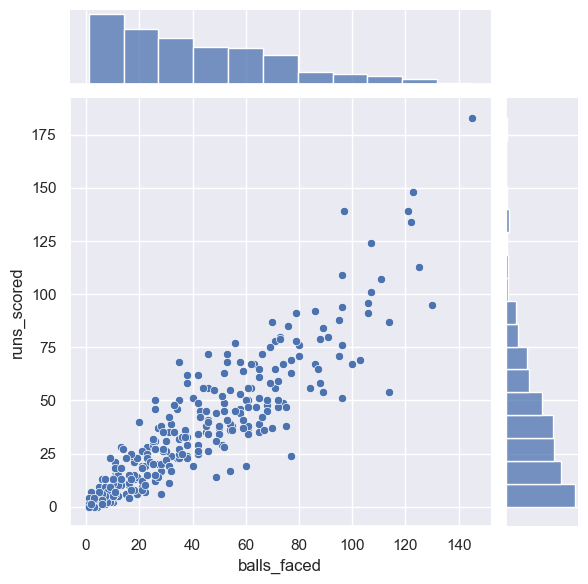

In [125]:
#jointplot
sns.jointplot(x='balls_faced', y='runs_scored',data=df_new, kind='scatter')
plt.show()

In [126]:
correlation_matrix = df_new[['balls_faced', 'runs_scored']].corr()

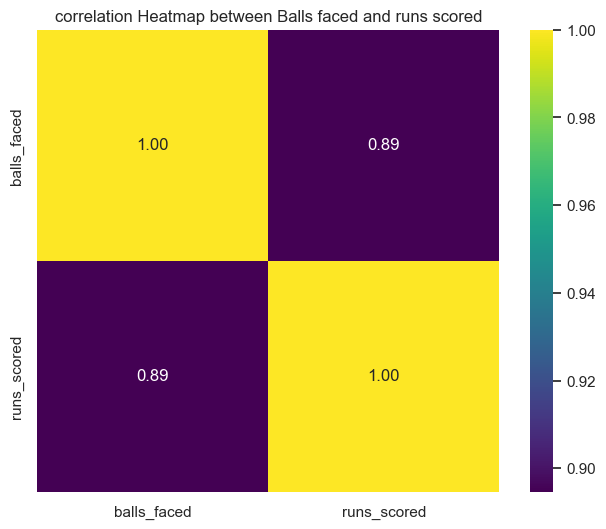

In [127]:
plt.figure(figsize=(8,6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='viridis', square=True, fmt='.2f')
plt.title('correlation Heatmap between Balls faced and runs scored')
plt.show()

In [128]:
# Calculate strke-rate per opposition and show as a heat map
grouped_by_opposition = df_filtered.groupby('opposition')
agg_sum = grouped_by_opposition.agg({'balls_faced':'sum', 'runs_scored': 'sum'})
df_strike_rate = agg_sum


In [129]:
df_strike_rate

,balls_faced,runs_scored
opposition,,
Australia,2052,1660
Bangladesh,682,569
England,1758,1546
New Zealand,1140,940
Pakistan,1361,1231
South Africa,950,830
Sri Lanka,2645,2383
West Indies,1108,1005


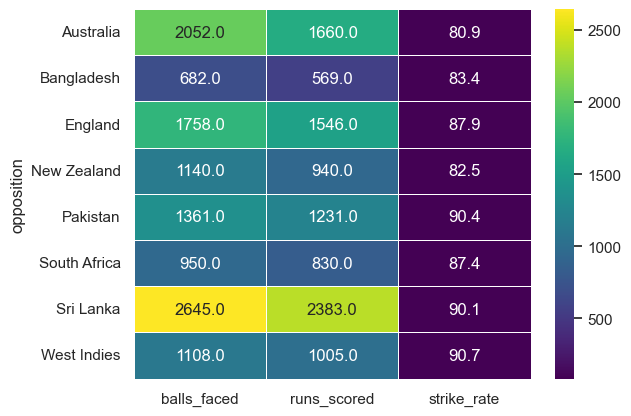

In [130]:
# calcuate strike rate
df_strike_rate['strike_rate'] = (df_strike_rate['runs_scored'] / df_strike_rate['balls_faced'])*100
sns.heatmap(df_strike_rate, linewidths=0.5,annot=True, fmt='.1f',cmap='viridis')
plt.show()

<Axes: ylabel='opposition'>

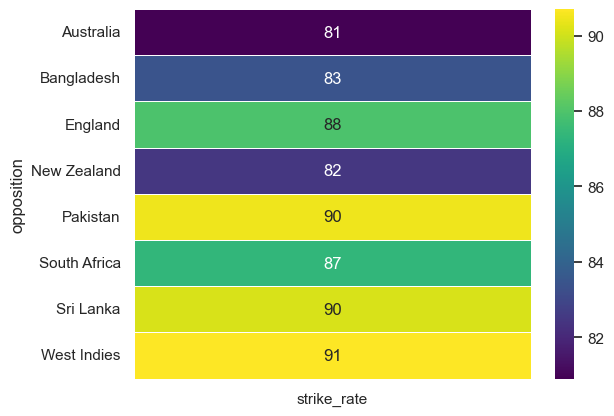

In [131]:
df_strike_rate = df_strike_rate[['strike_rate']]
sns.heatmap(df_strike_rate, linewidths=0.5,annot=True, fmt='.0f', cmap='viridis')